In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

In [12]:
pizza_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-bogdanova/stat_lesson4/experiment_lesson_4.csv')
pizza_test

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


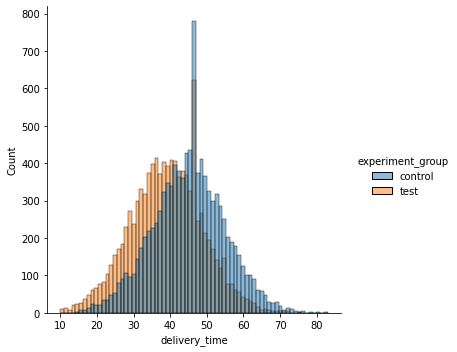

In [13]:
# step 3
#  Сопоставьте графики распределения и  экспериментальные группы:
sns.displot(x = pizza_test.delivery_time, hue = pizza_test.experiment_group)

In [18]:
# step 4
#  Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?
n_control = pizza_test \
    .query('experiment_group == "control"') \
    .count()[0]
n_test = pizza_test \
    .query('experiment_group == "test"') \
    .count()[0]
diff = np.abs(n_control - n_test)
diff

12

In [24]:
# step 5
# Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.
control_data = pizza_test \
    .query('experiment_group == "control"') \
    .delivery_time
test_data = pizza_test \
    .query('experiment_group == "test"') \
    .delivery_time
scipy.stats.normaltest(control_data, nan_policy = 'omit')

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [25]:
scipy.stats.normaltest(test_data, nan_policy = 'omit')

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [27]:
control_std = np.std(control_data)
control_std

9.989522000652327

In [28]:
test_std = np.std(test_data)
test_std

9.882819260031342

In [29]:
# step 6
# Теперь пришло время сравнить средние в тесте и контроле. 
stats.ttest_ind(control_data, test_data)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

In [31]:
# step 7
# На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 
#  Знак изменения необходимо учесть!
control_mean = control_data.mean()
test_mean = test_data.mean()
diff_perc = (test_mean - control_mean)/control_mean*100
diff_perc

-13.354653121660812